# CAPSTONE PROJECT: Health Care Case Study

## PROBLEM STATEMENT

NIDDK(National Institute of Diabetes and Kidney Diseases) research creates knowledge about
and treatments for the most chronic, costly and consequential diseases.
The dataset used in this project is originally from NIDDK. The objetive is to predict whether or not
a patient has Diabetes, based on certain diagnostic measurements included in the dataset.
Build a model to accurately predict whether the patients in the dataset have diabetes or not

### 1. Import data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_df = pd.read_csv('health care diabetes.csv')

In [3]:
print('train_df shape: ', train_df.shape)

train_df shape:  (768, 9)


In [4]:
train_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Exploratory Data Analysis (EDA)

1. Perform Descriptive analysis. Understand the
variables and their corresponding values. On the
columns (Glucose, Blood Pressure, Skin Thickness, Insulin, BMI), a value of 0 does not make
sense and thus indicates a missing value.

2. Visually explore these variables using
Histograms. Treat Missing values accordingly.

In [6]:
miss_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin'
, 'BMI']

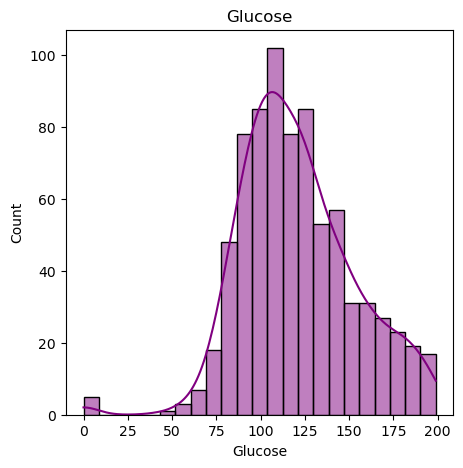

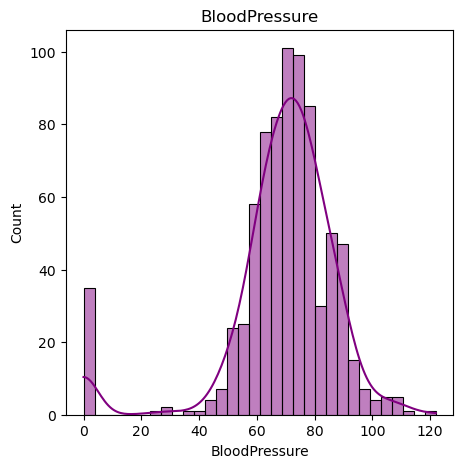

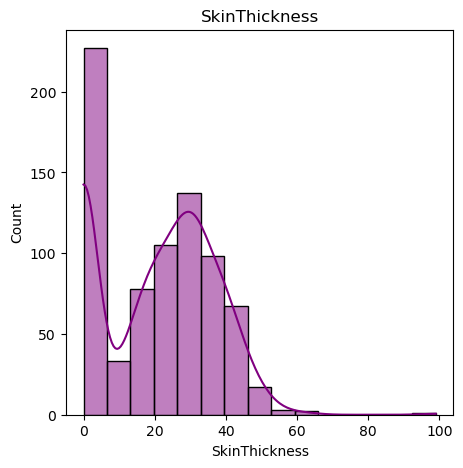

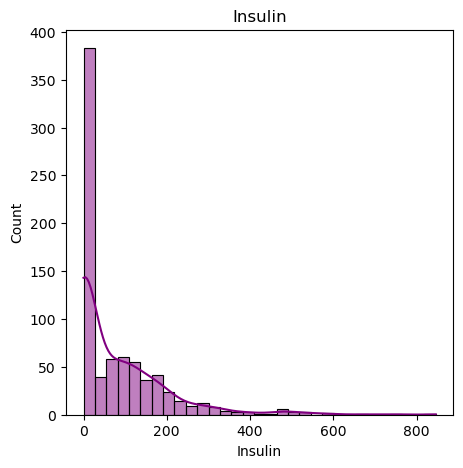

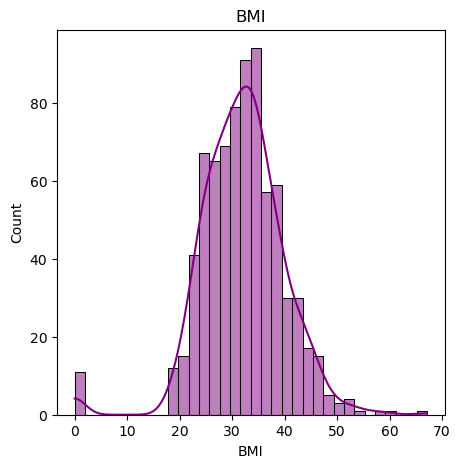

In [7]:
for col in miss_cols:
    plt.figure(figsize = (5, 5))
    plt.title(col)
    sns.histplot(train_df[col], kde = True, color = 'purple')

In [8]:
train_df[['Glucose', 'BloodPressure', 'SkinThickness',
'Insulin', 'BMI']] = train_df[['Glucose', 'BloodPressure',
'SkinThickness', 'Insulin', 'BMI']].replace(0, np.nan)

In [9]:
from sklearn.impute import SimpleImputer

In [10]:
imputer = SimpleImputer(strategy='mean')

In [11]:
imputed_train_df = imputer.fit_transform(train_df.values)

In [12]:
imputed_train_df

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [13]:
imputed_df = pd.DataFrame(imputed_train_df)

In [14]:
imputed_df.head()

,0,1,2,3,4,5,6,7,8
0,6.0,148.0,72.0,35.00000,155.548223,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.00000,155.548223,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,29.15342,155.548223,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.00000,94.000000,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.00000,168.000000,43.1,2.288,33.0,1.0


In [16]:
imputed_df.columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

In [17]:
imputed_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.00000,155.548223,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.00000,155.548223,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,29.15342,155.548223,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.00000,94.000000,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.00000,168.000000,43.1,2.288,33.0,1.0


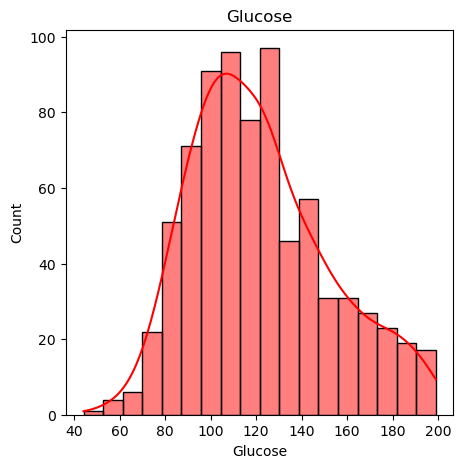

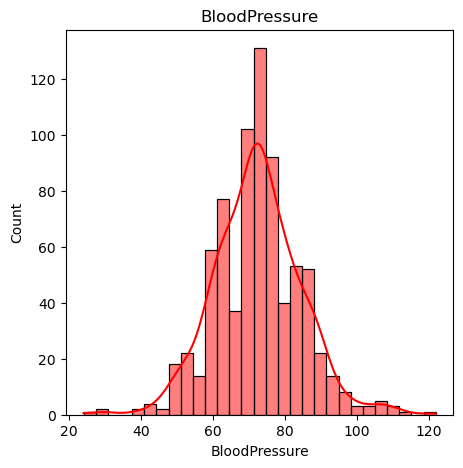

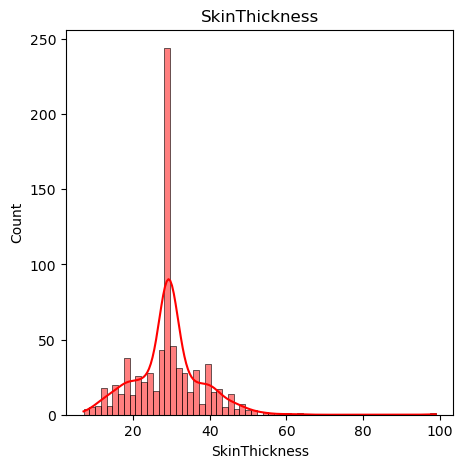

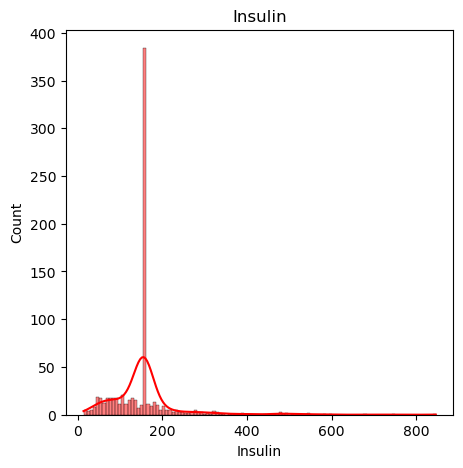

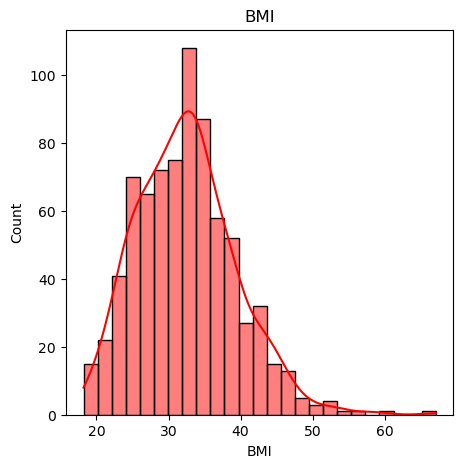

In [18]:
for col in miss_cols:
    plt.figure(figsize = (5, 5))
    plt.title(col)
    sns.histplot(imputed_df[col],kde=True, color='red')

In [19]:
imputed_df.dtypes

Pregnancies                 float64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                         float64
Outcome                     float64
dtype: object

### 3. There are Integer and Float data type variables in this dataset. create a count(Frequency) plot describing the data types and the count of variables.

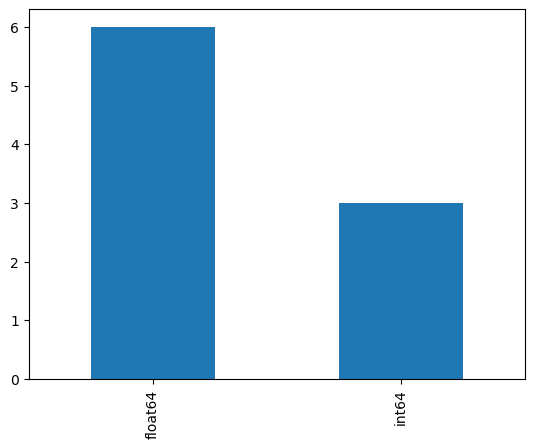

In [20]:
(train_df.dtypes).value_counts().plot(kind = 'bar')
plt.show()

### 4. Check the balance of the data by plotting the count of outcomes by their value. Describe your findings and plan future course of actions.

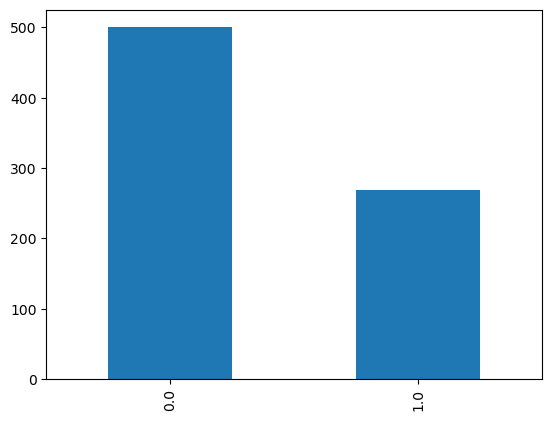

In [21]:
(imputed_df.Outcome).value_counts().plot(kind = 'bar')
plt.show()

In [22]:
imputed_df.Outcome.value_counts()

0.0    500
1.0    268
Name: Outcome, dtype: int64

In [23]:
round(imputed_df.Outcome.value_counts(normalize = True)*100, 2)

0.0    65.1
1.0    34.9
Name: Outcome, dtype: float64

This is a slightly imbalanced dataset with majority "Negative Class".

### 2. Create Scatter charts between the pair of variables to understand the relationships. Describe your findings.

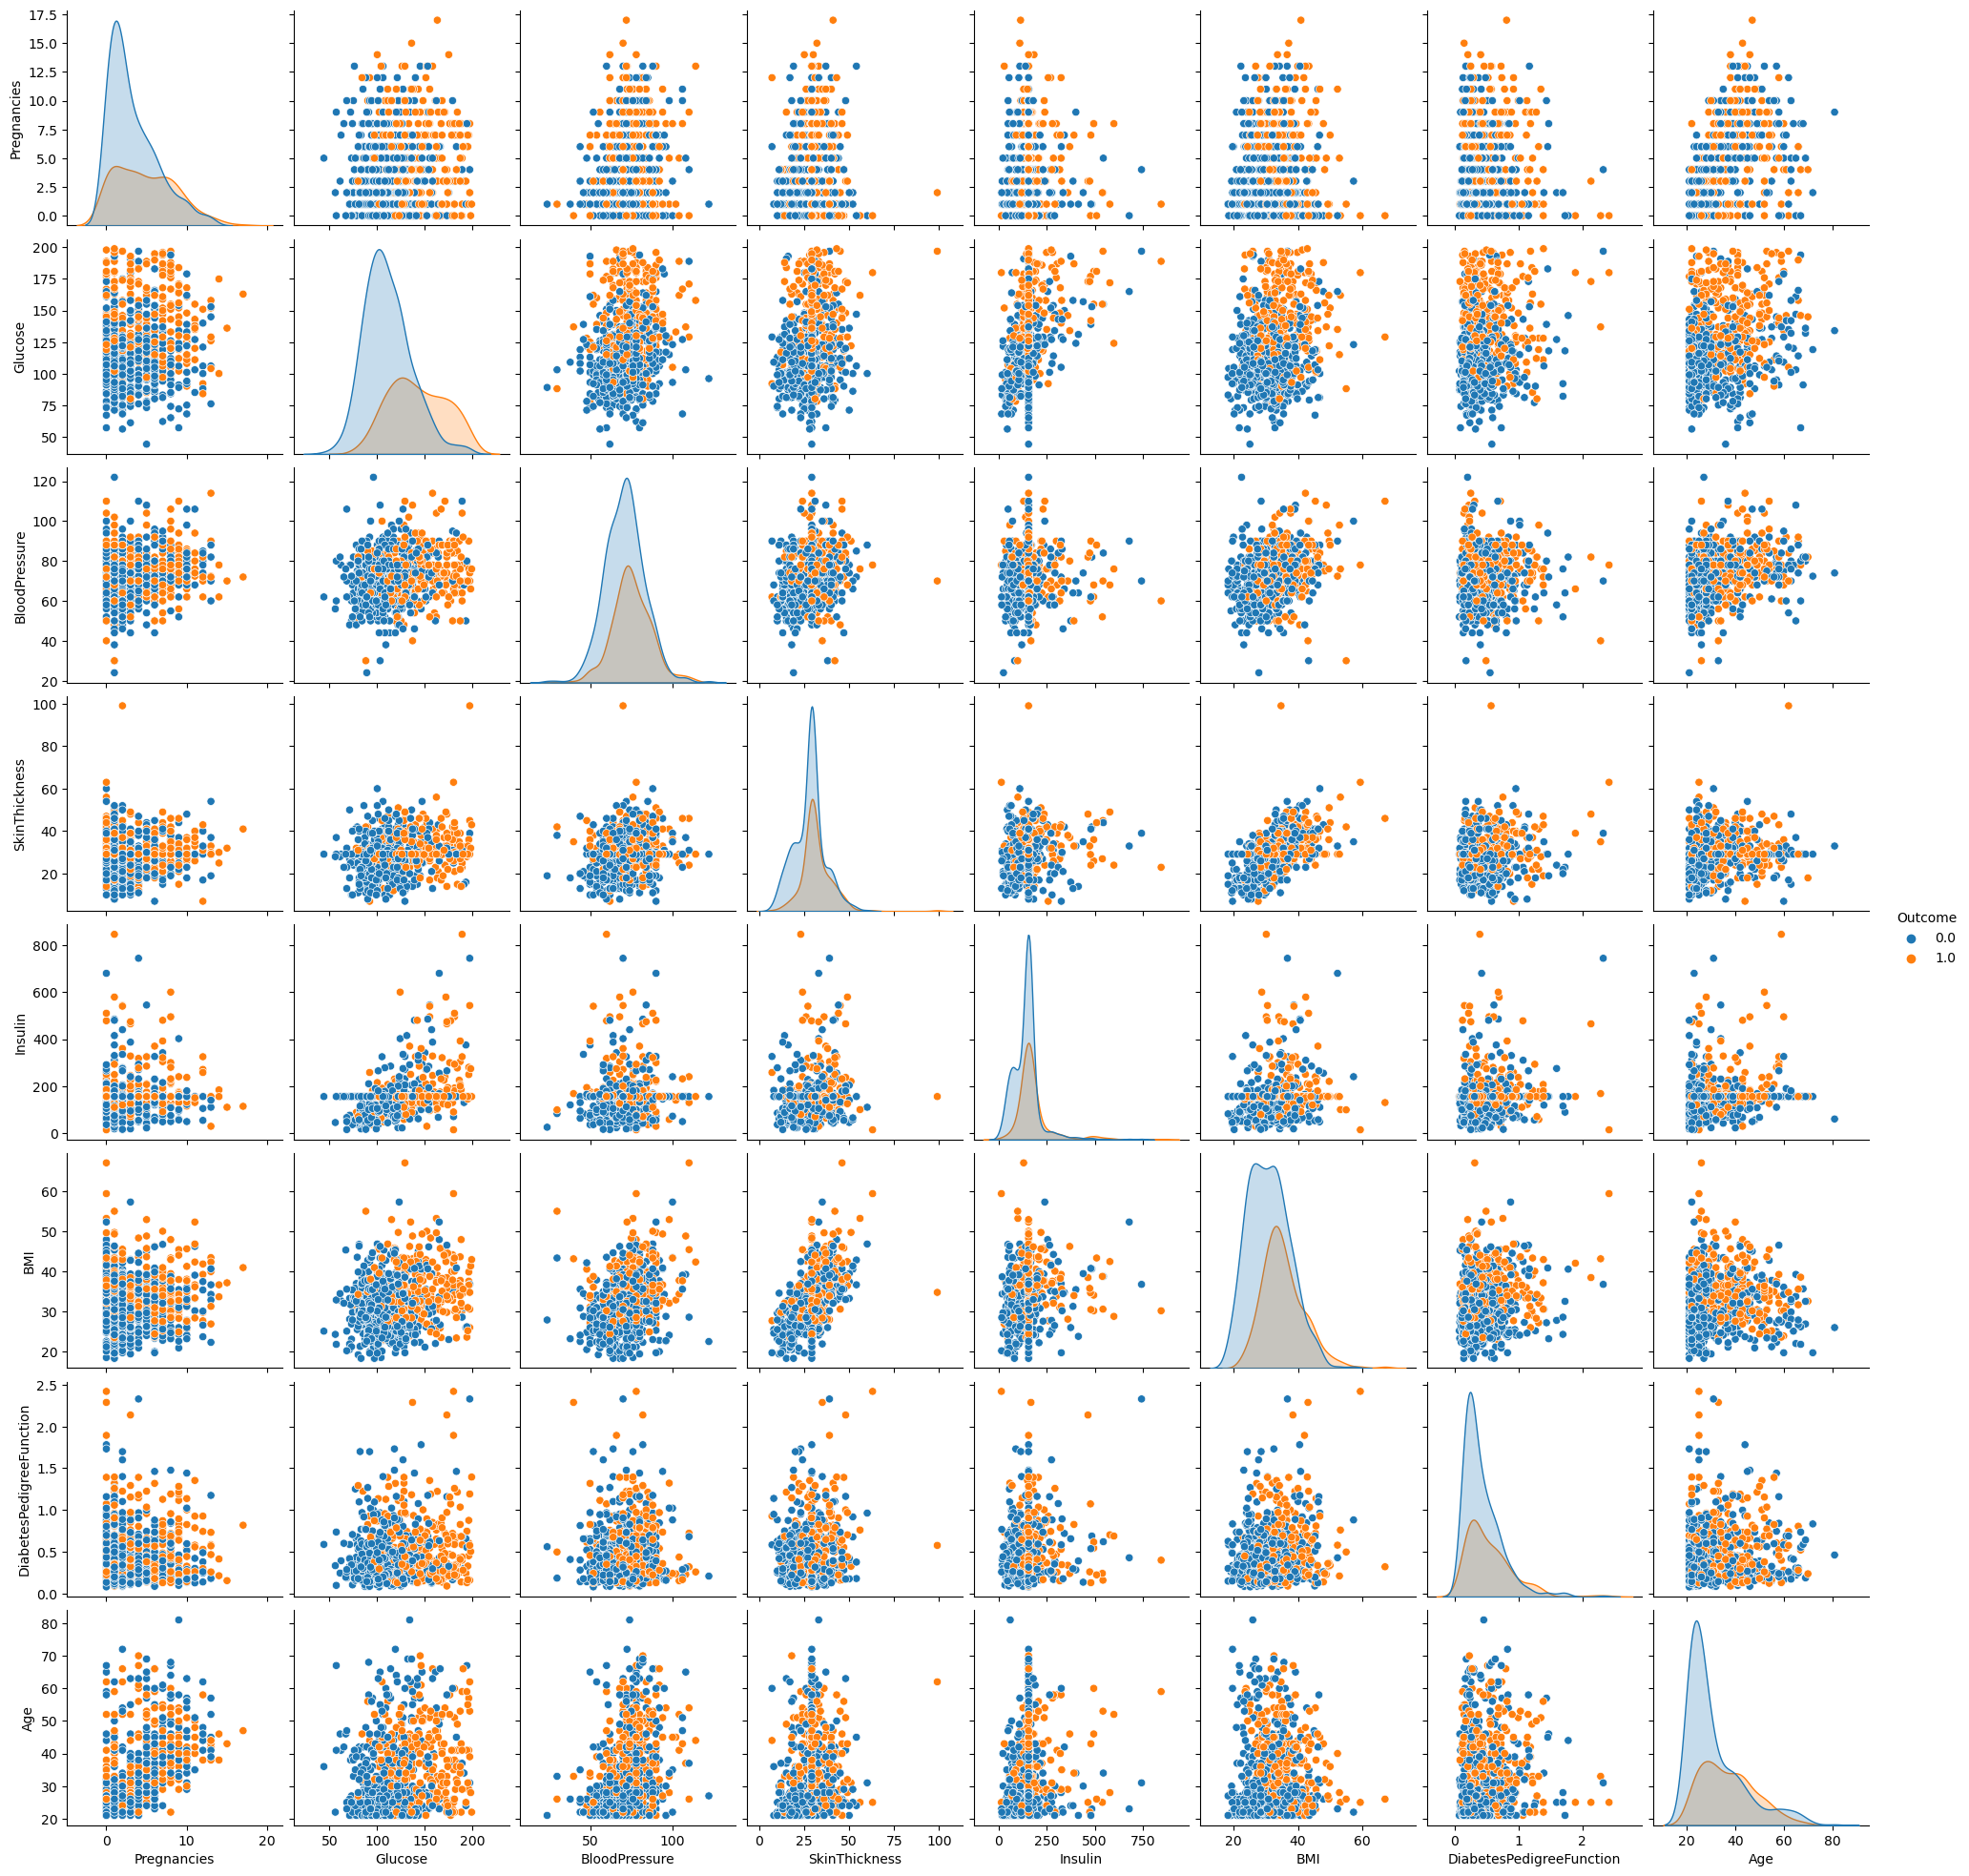

In [24]:
sns.pairplot(imputed_df, hue = 'Outcome')

### 3. Perform correlation analysis. Visually explore it using a heatmap.

In [25]:
round(imputed_df.corr()['Outcome'][:], 3).sort_values(ascending = False)

Outcome                     1.000
Glucose                     0.493
BMI                         0.312
Age                         0.238
Pregnancies                 0.222
SkinThickness               0.215
Insulin                     0.214
DiabetesPedigreeFunction    0.174
BloodPressure               0.166
Name: Outcome, dtype: float64

In [26]:
round(imputed_df.corr(), 3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000,0.128,0.209,0.083,0.056,0.022,-0.034,0.544,0.222
Glucose,0.128,1.000,0.218,0.193,0.420,0.231,0.137,0.267,0.493
BloodPressure,0.209,0.218,1.000,0.193,0.073,0.281,-0.003,0.325,0.166
SkinThickness,0.083,0.193,0.193,1.000,0.158,0.542,0.101,0.128,0.215
Insulin,0.056,0.420,0.073,0.158,1.000,0.167,0.099,0.137,0.214
BMI,0.022,0.231,0.281,0.542,0.167,1.000,0.153,0.026,0.312
DiabetesPedigreeFunction,-0.034,0.137,-0.003,0.101,0.099,0.153,1.000,0.034,0.174
Age,0.544,0.267,0.325,0.128,0.137,0.026,0.034,1.000,0.238
Outcome,0.222,0.493,0.166,0.215,0.214,0.312,0.174,0.238,1.000


<AxesSubplot:>

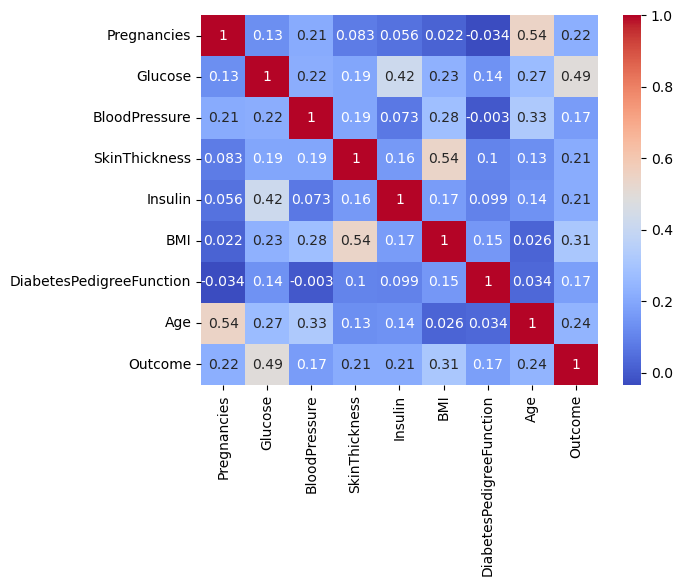

In [27]:
sns.heatmap(round(imputed_df.corr(), 3), cmap="coolwarm", annot = True)